In [8]:
import joblib
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [19]:
df = pd.read_json(r"D:/NLP/Dataset/dataset.json")
df.sample(10)


,category,text
16400,NotClassic,и все же пробелы и внутренние противоречия в з...
3860,Classic,и слышите как ахает уж вся московская улица па...
2202,Classic,значит не могу к тому же во всяком случае я не...
3883,Classic,зять известно знает шельма свою пользу и ухом ...
9149,Classic,дотащив веру юрьевну до внутренней лестницы ла...
14413,NotClassic,я слышал они перемещаются в тенях и двигаются ...
15540,NotClassic,я уезжаю хорошую работу предложили в киеве ког...
15116,NotClassic,то что этот дух безумен стало понятно сразу ис...
15353,NotClassic,тебе надо все это менять сказал ираклий неспеш...
838,Classic,манах которые нам приходилось читать в давно м...


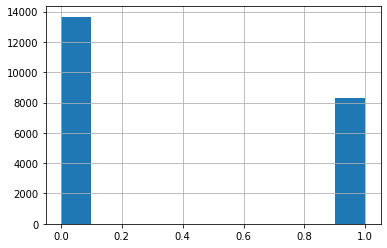

In [21]:
labels_map = {"Classic": 0, "NotClassic": 1}
df["labels"] = df["category"].map(labels_map)
df["labels"].hist()

In [9]:
df_train, df_test = train_test_split(df, random_state=19, test_size=0.25)
tfidf = TfidfVectorizer(max_features=20000)
tfidf_matrix = tfidf.fit_transform(df_train["text"])
tdidf_matrix_test = tfidf.transform(df_test["text"])

lr = LogisticRegression(C=2)
lr.fit(tfidf_matrix, df_train["labels"])

predict_labels = lr.predict(tdidf_matrix_test)

In [12]:
print(classification_report(df_test["labels"], predict_labels))
print(confusion_matrix(df_test["labels"], predict_labels))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3415
           1       1.00      0.99      0.99      2075

    accuracy                           1.00      5490
   macro avg       1.00      0.99      0.99      5490
weighted avg       1.00      1.00      1.00      5490

[[3411    4]
 [  22 2053]]


Чтобы отличить классический текст, от различных современных произведений не потребовалось лемматизации, подбора гиперпараметров или других моделей. Хватило Tfidf + LogReg из коробки. 

### Переобучение на полном датасете и сохранение модели.


In [13]:
tfidf = TfidfVectorizer(max_features=20000)
tfidf_matrix = tfidf.fit_transform(df["text"])


lr = LogisticRegression(C=2)
lr.fit(tfidf_matrix, df["labels"])

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
joblib.dump(lr, "src/TfIdf-LogReg.joblib")

['src/TfIdf-LogReg.joblib']